# Analyzing and Visualizing WeRateDogs

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('twitter_archive_master.csv')

In [3]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dog_stage,prediction_algorithm,confidence_level
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,36321,7729,NaN,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,31311,5723,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,23583,3786,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,39633,7894,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,37828,8514,NaN,basset,0.555712


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
tweet_id                1969 non-null int64
timestamp               1969 non-null object
text                    1969 non-null object
expanded_urls           1969 non-null object
rating_numerator        1969 non-null float64
rating_denominator      1969 non-null float64
name                    1969 non-null object
jpg_url                 1969 non-null object
favorite_count          1969 non-null int64
retweet_count           1969 non-null int64
dog_stage               305 non-null object
prediction_algorithm    1662 non-null object
confidence_level        1969 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 200.1+ KB


In [5]:
df.dtypes

tweet_id                  int64
timestamp                object
text                     object
expanded_urls            object
rating_numerator        float64
rating_denominator      float64
name                     object
jpg_url                  object
favorite_count            int64
retweet_count             int64
dog_stage                object
prediction_algorithm     object
confidence_level        float64
dtype: object

In [6]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,confidence_level
count,1.969000e+03,1969.000000,1969.0,1969.000000,1969.000000,1969.000000
mean,7.357958e+17,11.678517,10.0,8313.639919,2463.199594,0.463069
std,6.755645e+16,40.925842,0.0,12233.394856,4410.675333,0.339364
min,6.660209e+17,0.000000,10.0,72.000000,11.000000,0.000000
25%,6.757404e+17,10.000000,10.0,1777.000000,549.000000,0.138523
50%,7.081494e+17,11.000000,10.0,3770.000000,1191.000000,0.457164
75%,7.878106e+17,12.000000,10.0,10342.000000,2814.000000,0.772894
max,8.924206e+17,1776.000000,10.0,156813.000000,78140.000000,0.999956


#### Plot the correlation map to see the relationship between variables

Text(0.5, 1.0, 'Correlation Map')

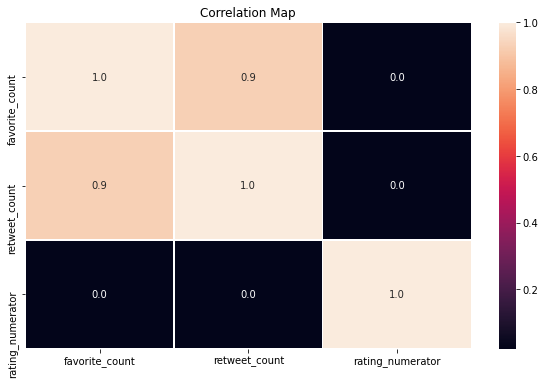

In [19]:
f,ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df[['favorite_count', 'retweet_count','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong relationship here is between retweet_count and favorate_count. This means the more people discuss this dog, the dog is more popular.
- This table does not show that ratint_numerator have a straight relationship with other two variables. 

#### Retweet Counts and Favorates Counts

Text(0.5, 1.0, 'Retweet and Favorites Scatter plot')

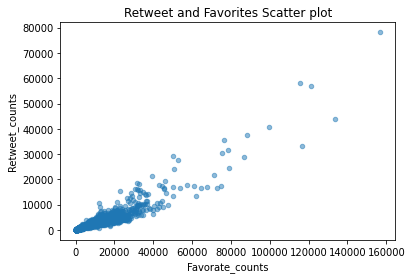

In [8]:
df.plot(kind='scatter',x = 'favorite_count', y= 'retweet_count',alpha = 0.5)
plt.xlabel('Favorate_counts')
plt.ylabel('Retweet_counts')
plt.title('Retweet and Favorites Scatter plot')

- As the plot shows that the retweet counts has great correlationship with favorite counts.

#### Dog Rating Activity over the time

In [10]:
df.timestamp = pd.to_datetime(df.timestamp)

In [11]:
monthly_tweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()

In [12]:
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]

In [13]:
monthly_tweets.head()

,timestamp,tweet_id
0,2015-11-30,295
1,2015-12-31,364
2,2016-01-31,166
3,2016-02-29,109
4,2016-03-31,117


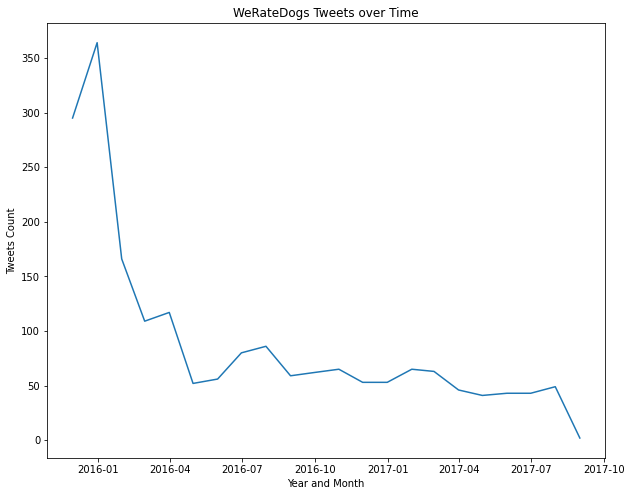

In [14]:
# plotting time vs. tweets
plt.figure(figsize = (10,8))
plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')
plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');

- From the plot, we can see that on late 2015 to early 2016, WeRateDogs has a spike activity then decreases from then.

#### Visualize the most popular dog breed

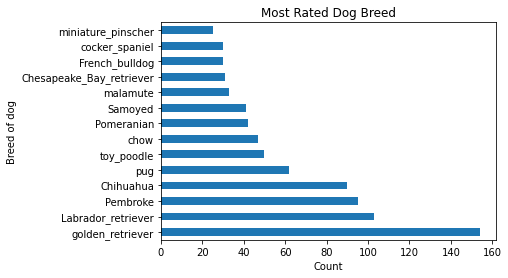

In [15]:
dog_breed = df.groupby('prediction_algorithm').filter(lambda x: len(x) >= 25)
dog_breed['prediction_algorithm'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

- The most popular dog breed is golder retriever, followed by labrador retriever in the second place.

#### Visualize the dog stage

(-1.2887877067574471, 1.236187684500461, -1.22859557858243, 1.2101818882398883)

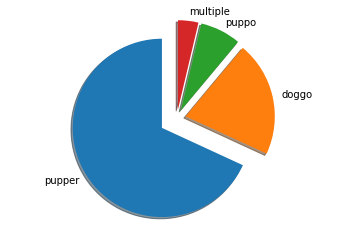

In [16]:
dog_stage_count = list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

- Pupper is the most owned dog showed in WeRateDog.